In [20]:
from coreLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source"
ds=DataSet(data_dir)
ds.common.symbols.df

#LOG     :All paths found


  0%|          | 1173/1059977 [00:00<01:30, 11728.92it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 534711.10it/s]


#LOG     :converting int labels to string


  1%|          | 3796/370098 [00:00<00:18, 19398.45it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 310168.15it/s]


#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

,filename,label,img_path
0,symbol_0,>,/media/ansary/DriveData/Work/bengalAI/datasets...
1,symbol_1,>,/media/ansary/DriveData/Work/bengalAI/datasets...
2,symbol_2,>,/media/ansary/DriveData/Work/bengalAI/datasets...
3,symbol_3,>,/media/ansary/DriveData/Work/bengalAI/datasets...
4,symbol_4,>,/media/ansary/DriveData/Work/bengalAI/datasets...
...,...,...,...
5970,symbol_5970,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5971,symbol_5971,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5972,symbol_5972,<,/media/ansary/DriveData/Work/bengalAI/datasets...
5973,symbol_5973,<,/media/ansary/DriveData/Work/bengalAI/datasets...


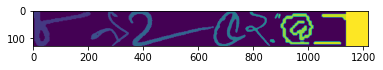

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
iden=2
from coreLib.word import create_word
img,label,iden=create_word(iden,
                            "bangla",
                            "handwritten",
                            "number",
                            ds,
                            use_dict=True)
# max neutralization
plt.imshow(img)
plt.show()


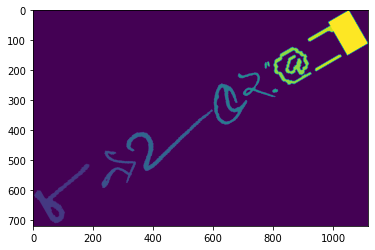

{2: '৮', 3: '৯', 4: '২', 5: '৫', 6: '২', 7: '.', 8: "'", 9: "'", 10: '@', 11: '=', 12: ' '}


In [22]:
def rotate_image(mat, angle):
    """
        Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h),flags=cv2.INTER_NEAREST)
    return rotated_mat,rotation_mat


rotated_img,M=rotate_image(img,30)
plt.imshow(rotated_img)
plt.show()
print(label)
#_img=cv2.resize(_img,(width,font_size)),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)

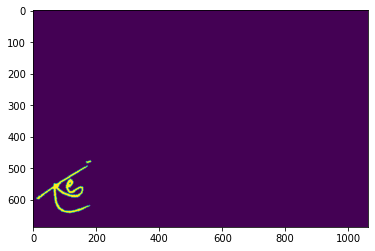

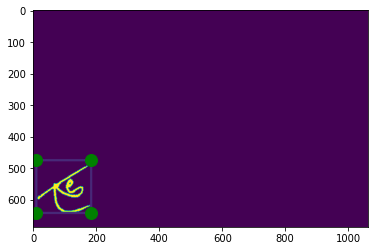

In [13]:
back=np.zeros(rotated_img.shape)
back[rotated_img==2]=255
plt.imshow(back)
plt.show()
# co-ordinate
idx = np.where(back==255)
y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
x1,x2,x3,x4=x_min,x_max,x_max,x_min
y1,y2,y3,y4=y_min,y_min,y_max,y_max
coords=np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]],dtype="float32")

single = cv2.rectangle(back, (x1,y1), (x3,y3), 30, 5)
plt.plot(x1, y1, 'go--', linewidth=2, markersize=12)
plt.plot(x2, y2, 'go--', linewidth=2, markersize=12)
plt.plot(x3, y3, 'go--', linewidth=2, markersize=12)
plt.plot(x4, y4, 'go--', linewidth=2, markersize=12)
plt.imshow(single)
plt.show()

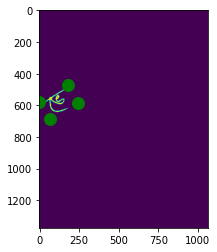

In [19]:
back=np.zeros(rotated_img.shape)
back[rotated_img==2]=255
back=np.concatenate([back,np.zeros(back.shape)],axis=0)
# co-ordinate
idx = np.where(img==2)
y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
x1,x2,x3,x4=x_min,x_max,x_max,x_min
y1,y2,y3,y4=y_min,y_min,y_max,y_max
coords=np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]],dtype="float32")

new_coords=[]
coord_mat=np.concatenate([coords,np.ones((4,1))],axis=1)
for c in coord_mat:
    new_coords.append(np.dot(M,c))

plt.imshow(back)
for c in new_coords:
    plt.plot(c[0], c[1], 'go--', linewidth=2, markersize=12)

plt.show()


